# Exercises

In [1]:
import unicodedata
import re
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import pandas as pd

import prepare
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud

**1. Spam Data**
    
a. Load the spam data set.

In [2]:
# acquire the raw data
df = pd.read_csv('spam.csv', 
                 encoding='latin-1',
                 usecols=[0,1]) # use first 2 columns only to get rid of unnamed columns full of nans
df.columns = ['label', 'text']

In [3]:
# prepare the data cleaned
df = prepare.prep_article_data(df, 'text')

In [4]:
# add a words column
words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in df.lemmatized]

# column name will be words, and the column will contain lists of the words in each doc
df = pd.concat([df, pd.DataFrame({'words': words})], axis=1)

In [5]:
df.head()

,label,original,clean,stemmed,lemmatized,words
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joke wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,free entri 2 wkli comp win fa cup final tkt 21...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t..."
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,u dun say earli hor u c alreadi say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah ' think goes usf lives around though,nah ' think goe usf live around though,nah ' think go usf life around though,"[nahthink, go, usf, life, around, though]"


In [6]:
# make strings of all words in each category
ham_words = ' '.join(df[df.label=='ham'].lemmatized)
spam_words = ' '.join(df[df.label=='spam'].lemmatized)
all_words = ' '.join(df.lemmatized)

ham_words = re.sub(r'\s.\s', '', ham_words)
spam_words = re.sub(r'\s.\s', '', spam_words)
all_words = re.sub(r'\s.\s', '', all_words)

In [7]:
# create a series to see how often each word occurs
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

all_freq.head()

call    499
ur      340
get     328
ltgt    241
go      232
dtype: int64

In [8]:
# create a df with all word counts combined
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
               .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
               .fillna(0)
               .apply(lambda s: s.astype(int))
              )

word_counts.head()

,all,ham,spam
008704050406,2,0,2
0089my,1,0,1
0121,1,0,1
01223585236,1,0,1
01223585334,2,0,2


In [9]:
# add a document length column
df['doc_length'] = [len(wordlist) for wordlist in df.words]

In [10]:
df[df.doc_length==0]

,label,original,clean,stemmed,lemmatized,words,doc_length
959,ham,Where @,,,,[],0
2805,ham,Can a not?,,,,[],0
3374,ham,:),,,,[],0
4573,ham,:( but your not here....,,,,[],0
4822,ham,:-) :-),,,,[],0


In [11]:
# eliminate rows with no resulting text
df = df[df.doc_length!=0]

In [12]:
df.head()

,label,original,clean,stemmed,lemmatized,words,doc_length
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugisgre...",12
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joke wif u oni,ok lar joking wif u oni,"[ok, lar, joking, wifoni]",4
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,free entri 2 wkli comp win fa cup final tkt 21...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entrywkly, comp, win, fa, cup, final, t...",20
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,u dun say earli hor u c alreadi say,u dun say early hor u c already say,"[u, dun, say, early, horc, already, say]",7
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah ' think goes usf lives around though,nah ' think goe usf live around though,nah ' think go usf life around though,"[nahthink, go, usf, life, around, though]",6


 b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

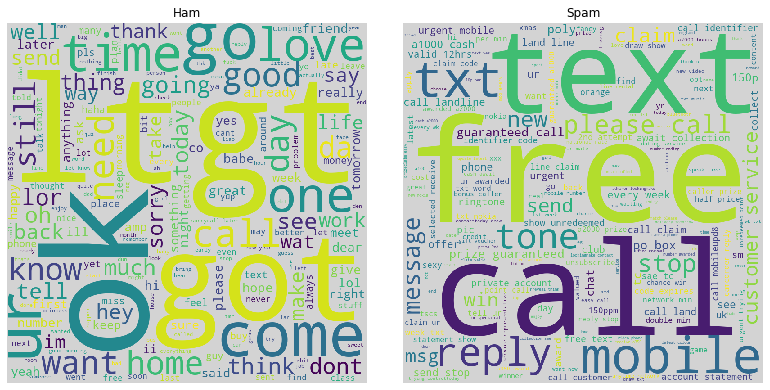

In [13]:
# word cloud for ham and spam words
ham_cloud = WordCloud(background_color='lightgray', 
                      height=800, width=800).generate(ham_words)

spam_cloud = WordCloud(background_color='lightgray', 
                      height=800, width=800).generate(spam_words)

plt.figure(figsize=(10,10))
axs = [plt.axes([.25, 1, .5, .5]), plt.axes([.8, 1, .5, .5])]

# imshow => display data as an image
axs[0].imshow(ham_cloud)
axs[1].imshow(spam_cloud)

axs[0].set_title('Ham')
axs[1].set_title('Spam')

for ax in axs: ax.axis('off')

In [14]:
# add bigrams to the df
df['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in df.words]

In [15]:
# get the bigrams for ham and spam
ham_bigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 2))).value_counts()
spam_bigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 2))).value_counts()

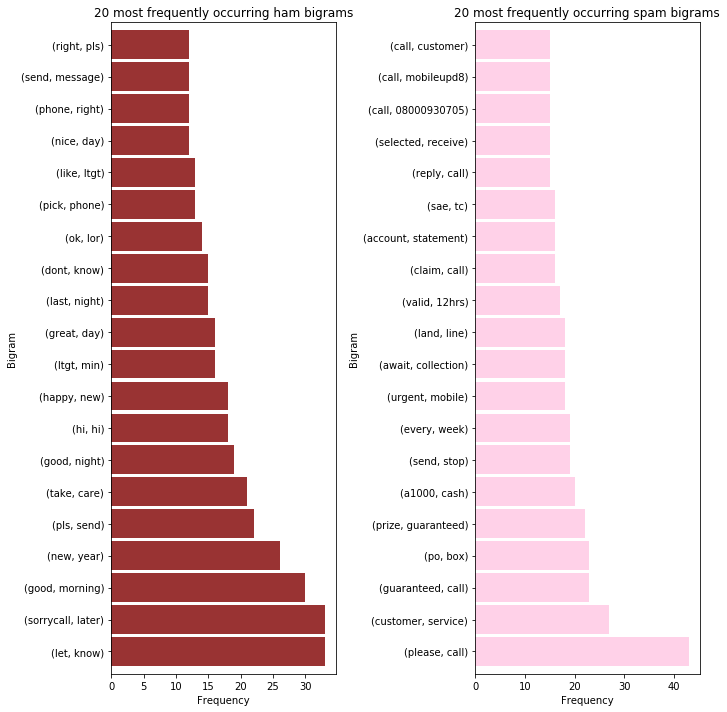

In [16]:
plt.subplot(121)
ham_bigrams.head(20).plot.barh(color='maroon', width=.9, figsize=(10, 10), alpha=.8)
plt.title('20 most frequently occurring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

plt.subplot(122)
spam_bigrams.head(20).plot.barh(color='hotpink', width=.9, figsize=(10, 10), alpha=.3)
plt.title('20 most frequently occurring spam bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

 c. Is there any overlap in the bigrams for the spam data and the ham data?

In [17]:
ham_bigrams.index.isin(spam_bigrams.index).sum()

110

 d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [18]:
# add trigrams to the df
df['trigrams'] = [list(nltk.ngrams(wordlist, 3)) for wordlist in df.words]

In [19]:
# get the trigrams for ham and spam
ham_trigrams = pd.Series(list(nltk.ngrams(ham_words.split(), 3))).value_counts()
spam_trigrams = pd.Series(list(nltk.ngrams(spam_words.split(), 3))).value_counts()

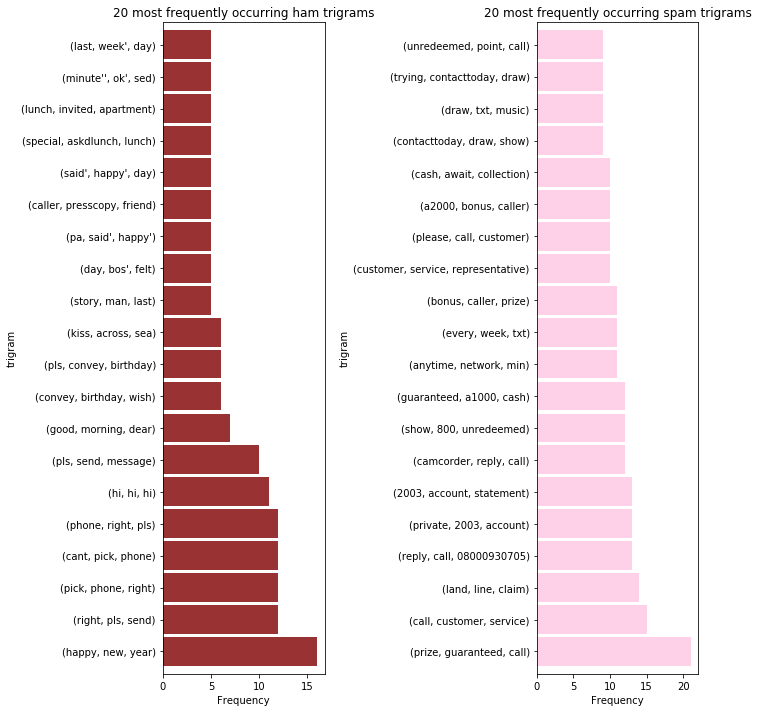

In [20]:
plt.subplot(121)
ham_trigrams.head(20).plot.barh(color='maroon', width=.9, figsize=(10, 10), alpha=.8)
plt.title('20 most frequently occurring ham trigrams')
plt.ylabel('trigram')
plt.xlabel('Frequency')

plt.subplot(122)
spam_trigrams.head(20).plot.barh(color='hotpink', width=.9, figsize=(10, 10), alpha=.3)
plt.title('20 most frequently occurring spam trigrams')
plt.ylabel('trigram')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

In [21]:
# import functions
from acquire import get_all_urls, get_blog_articles, get_news_articles
from prepare import  prep_article_data

In [22]:
# acquire + prep data
codeup_df = prep_article_data(get_blog_articles(get_all_urls()), 'content')
news_df = prep_article_data(get_news_articles(), 'content')

**2. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.**

In [23]:
news_df.topic.value_counts()

technology       25
business         25
sports           25
entertainment    24
Name: topic, dtype: int64

In [24]:
sport_words = ' '.join(news_df[news_df.topic=='sports'].lemmatized)
tech_words = ' '.join(news_df[news_df.topic=='technology'].lemmatized)
ent_words = ' '.join(news_df[news_df.topic=='entertainment'].lemmatized)
biz_words = ' '.join(news_df[news_df.topic=='business'].lemmatized)
all_words = ' '.join(news_df.lemmatized)

sport_words = re.sub(r'\s.\s', '', sport_words)
tech_words = re.sub(r'\s.\s', '', tech_words)
ent_words = re.sub(r'\s.\s', '', ent_words)
biz_words = re.sub(r'\s.\s', '', biz_words)
all_words = re.sub(r'\s.\s', '', all_words)

In [25]:
sport_freq = pd.Series(sport_words.split()).value_counts()
tech_freq = pd.Series(tech_words.split()).value_counts()
ent_freq = pd.Series(ent_words.split()).value_counts()
biz_freq = pd.Series(biz_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

biz_freq.head()

bank       17
said       15
india      12
billion     7
tuesday     6
dtype: int64

In [26]:
words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in news_df.lemmatized]

# column name will be words, and the column will contain lists of the words in each doc
news_df = pd.concat([news_df, pd.DataFrame({'words': words})], axis=1)

In [27]:
word_counts = (pd.concat([all_freq, sport_freq, tech_freq, ent_freq, biz_freq], axis=1, sort=True)
               .set_axis(['all', 'sport', 'tech', 'ent', 'biz'], axis=1, inplace=False)
               .fillna(0)
               .apply(lambda s: s.astype(int))
              )

word_counts.sort_values(by='all', ascending=False).head(10)

,all,sport,tech,ent,biz
said,58,15,15,13,15
india,32,14,4,2,12
added,24,5,4,10,5
year,20,4,5,5,6
bank,18,0,1,0,17
tuesday,17,6,4,1,6
australia,16,16,0,0,0
2020,16,7,4,1,4
also,14,4,5,1,4
twitter,13,4,5,3,1


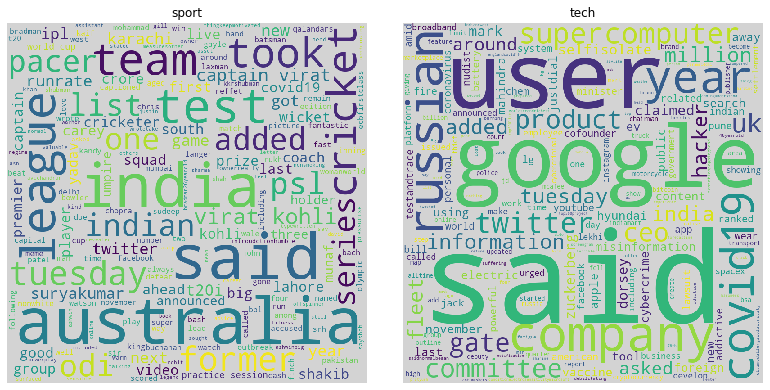

In [28]:
sport_cloud = WordCloud(background_color='lightgray', 
                      height=800, width=800).generate(sport_words)

tech_cloud = WordCloud(background_color='lightgray', 
                      height=800, width=800).generate(tech_words)

plt.figure(figsize=(10,10))
axs = [plt.axes([.25, 1, .5, .5]), plt.axes([.8, 1, .5, .5])]

# imshow => display data as an image
axs[0].imshow(sport_cloud)
axs[1].imshow(tech_cloud)

axs[0].set_title('sport')
axs[1].set_title('tech')

for ax in axs: ax.axis('off')

In [29]:
sport_bigrams = pd.Series(list(nltk.ngrams(sport_words.split(), 2))).value_counts()
tech_bigrams = pd.Series(list(nltk.ngrams(tech_words.split(), 2))).value_counts()
ent_bigrams = pd.Series(list(nltk.ngrams(ent_words.split(), 2))).value_counts()
biz_bigrams = pd.Series(list(nltk.ngrams(biz_words.split(), 2))).value_counts()

In [30]:
sport_trigrams = pd.Series(list(nltk.ngrams(sport_words.split(), 3))).value_counts()
tech_trigrams = pd.Series(list(nltk.ngrams(tech_words.split(), 3))).value_counts()
ent_trigrams = pd.Series(list(nltk.ngrams(ent_words.split(), 3))).value_counts()
biz_trigrams = pd.Series(list(nltk.ngrams(biz_words.split(), 3))).value_counts()

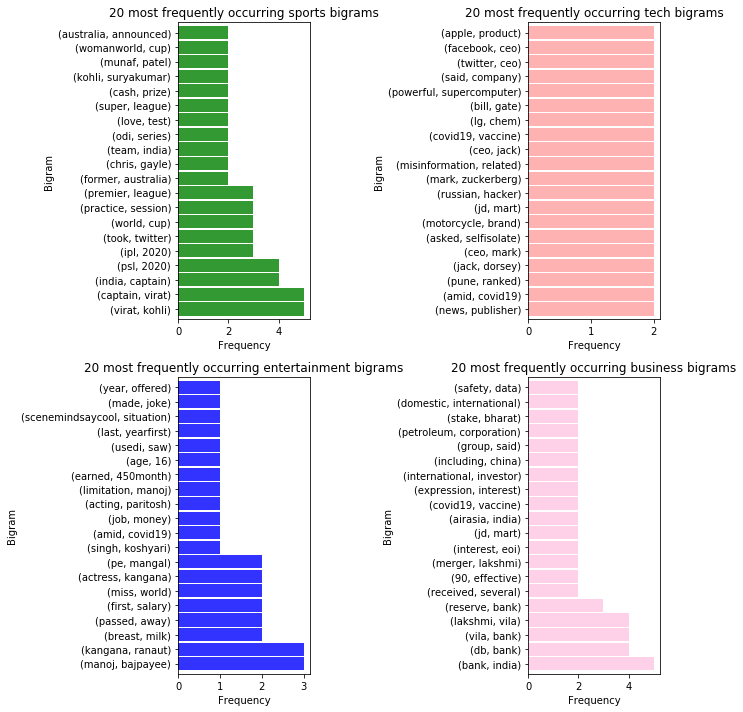

In [31]:
plt.figure(figsize=(9,9))
plt.subplot(221)
sport_bigrams.head(20).plot.barh(color='green', width=.9, figsize=(10, 10), alpha=.8)
plt.title('20 most frequently occurring sports bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

plt.subplot(222)
tech_bigrams.head(20).plot.barh(color='red', width=.9, figsize=(10, 10), alpha=.3)
plt.title('20 most frequently occurring tech bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')
plt.tight_layout()

plt.subplot(223)
ent_bigrams.head(20).plot.barh(color='blue', width=.9, figsize=(10, 10), alpha=.8)
plt.title('20 most frequently occurring entertainment bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

plt.subplot(224)
biz_bigrams.head(20).plot.barh(color='hotpink', width=.9, figsize=(10, 10), alpha=.3)
plt.title('20 most frequently occurring business bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

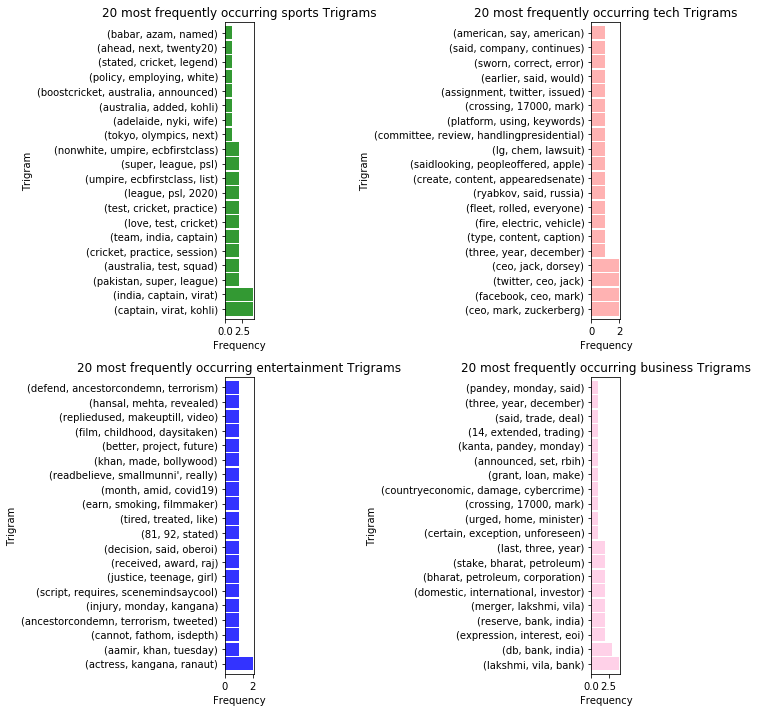

In [32]:
plt.figure(figsize=(9,9))
plt.subplot(221)
sport_trigrams.head(20).plot.barh(color='green', width=.9, figsize=(10, 10), alpha=.8)
plt.title('20 most frequently occurring sports Trigrams')
plt.ylabel('Trigram')
plt.xlabel('Frequency')

plt.subplot(222)
tech_trigrams.head(20).plot.barh(color='red', width=.9, figsize=(10, 10), alpha=.3)
plt.title('20 most frequently occurring tech Trigrams')
plt.ylabel('Trigram')
plt.xlabel('Frequency')
plt.tight_layout()

plt.subplot(223)
ent_trigrams.head(20).plot.barh(color='blue', width=.9, figsize=(10, 10), alpha=.8)
plt.title('20 most frequently occurring entertainment Trigrams')
plt.ylabel('Trigram')
plt.xlabel('Frequency')

plt.subplot(224)
biz_trigrams.head(20).plot.barh(color='hotpink', width=.9, figsize=(10, 10), alpha=.3)
plt.title('20 most frequently occurring business Trigrams')
plt.ylabel('Trigram')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

**3. Explore the blog articles using the techniques discussed in the exploration lesson.**

In [33]:
words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in codeup_df.lemmatized]

# column name will be words, and the column will contain lists of the words in each doc
codeup_df = pd.concat([codeup_df, pd.DataFrame({'words': words})], axis=1)

In [34]:
codeup_df.head()

,title,original,clean,stemmed,lemmatized,words
0,How Codeup Alumni Helped Dallas Youth Fight CO...,Three of our Web Development alumni from Dalla...,three web development alumni dallas rex sutton...,three web develop alumni dalla rex sutton ry s...,three web development alumnus dallas rex sutto...,"[three, web, development, alumnus, dallas, rex..."
1,How We’re Celebrating World Mental Health Day ...,World Mental Health Day is on October 10th. Al...,world mental health day october 10th us codeup...,world mental health day octob 10th us codeup w...,world mental health day october 10th u codeup ...,"[world, mental, health, day, october, 10thcode..."
2,From Slacker to Data Scientist: Journey to Dat...,Butterflies in my belly; my stomach is tied up...,butterflies belly stomach tied knots know im t...,butterfli belli stomach tie knot know im take ...,butterfly belly stomach tied knot know im taki...,"[butterfly, belly, stomach, tied, knot, know, ..."
3,What is the Transition into Data Science Like?,Alumni Katy Salts and Brandi Reger joined us a...,alumni katy salts brandi reger joined us publi...,alumni kati salt brandi reger join us public p...,alumnus katy salt brandi reger joined u public...,"[alumnus, katy, salt, brandi, reger, joinedpub..."
4,Codeup on Inc. 5000 Fastest Growing Private Co...,We’re excited to announce a huge Codeup achiev...,excited announce huge codeup achievement inc m...,excit announc huge codeup achiev inc magazin p...,excited announce huge codeup achievement inc m...,"[excited, announce, huge, codeup, achievement,..."


In [35]:
all_words = ' '.join(codeup_df.lemmatized)
all_words = re.sub(r'\s.\s', '', all_words)

In [36]:
all_freq = pd.Series(all_words.split()).value_counts()

all_freq.head()

data        137
codeup      106
science      51
job          51
learning     51
dtype: int64

In [37]:
word_counts = (pd.concat([all_freq], axis=1, sort=True)
               .set_axis(['all'], axis=1, inplace=False)
               .fillna(0)
               .apply(lambda s: s.astype(int))
              )

word_counts.sort_values(by='all', ascending=False).head(10)

,all
data,137
codeup,106
job,51
science,51
learning,51
like,48
student,44
learn,43
help,43
get,41


(-0.5, 399.5, 199.5, -0.5)

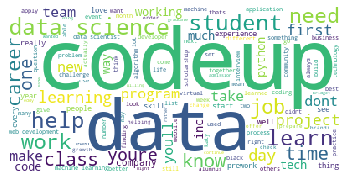

In [38]:
img = WordCloud(background_color='white').generate(all_words)
plt.imshow(img)

plt.axis('off')

In [39]:
all_bigrams = pd.Series(list(nltk.ngrams(all_words.split(), 2))).value_counts()
all_trigrams = pd.Series(list(nltk.ngrams(all_words.split(), 3))).value_counts()
all_quadgrams = pd.Series(list(nltk.ngrams(all_words.split(), 4))).value_counts()
all_pentagrams = pd.Series(list(nltk.ngrams(all_words.split(), 5))).value_counts()

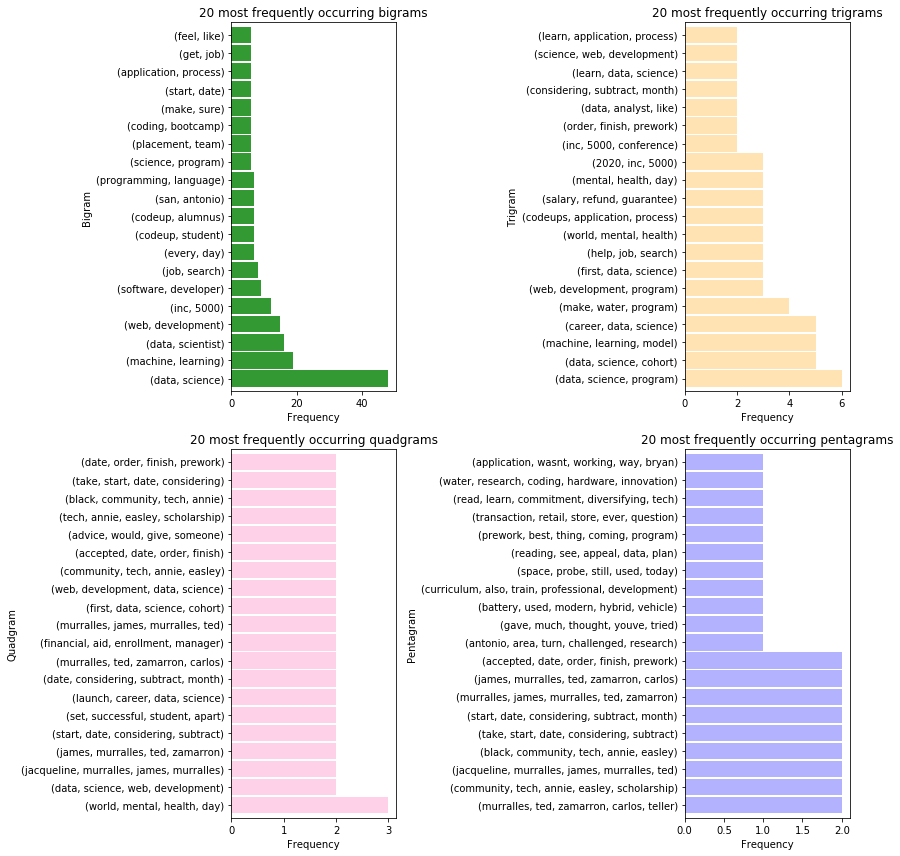

In [40]:
plt.figure(figsize=(12,12))
plt.subplot(221)
all_bigrams.head(20).plot.barh(color='green', width=.9, alpha=.8)
plt.title('20 most frequently occurring bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

plt.subplot(222)
all_trigrams.head(20).plot.barh(color='orange', width=.9, alpha=.3)
plt.title('20 most frequently occurring trigrams')
plt.ylabel('Trigram')
plt.xlabel('Frequency')

plt.subplot(223)
all_quadgrams.head(20).plot.barh(color='hotpink', width=.9, alpha=.3)
plt.title('20 most frequently occurring quadgrams')
plt.ylabel('Quadgram')
plt.xlabel('Frequency')

plt.subplot(224)
all_pentagrams.head(20).plot.barh(color='blue', width=.9, alpha=.3)
plt.title('20 most frequently occurring pentagrams')
plt.ylabel('Pentagram')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()